# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd

import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

import patsy

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
reg1 = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           2.64e-20
Time:                        01:54:49   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
reg2 = smf.ols('tip ~ smoker + net_bill', data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           4.56e-22
Time:                        01:54:49   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

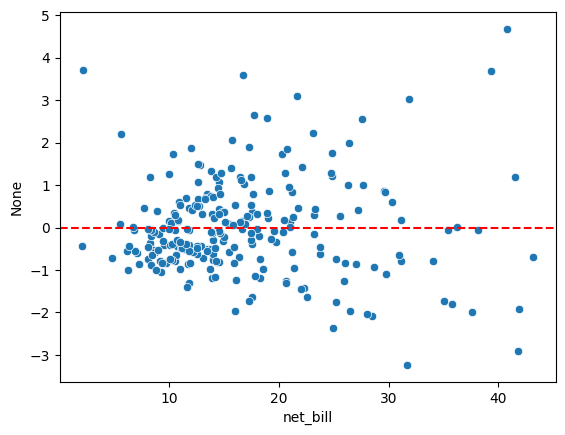

In [5]:
plt.close('all')
sns.scatterplot(x='net_bill', y=reg2.resid, data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [6]:
reg3 = smf.ols('tip ~ smoker + np.log(net_bill)', data=tips).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           5.38e-19
Time:                        01:54:49   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
reg4 = smf.ols('tip ~ smoker + np.power(net_bill,2)', data=tips).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.04e-19
Time:                        01:54:49   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- O modelo reg4 em Polinômio é melhor.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [8]:
reg5 = smf.ols('tip_pct ~ sex + smoker + time + net_bill', data = tips).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.85e-05
Time:                        01:54:49   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
reg6 = smf.ols('tip_pct ~ smoker + net_bill', data = tips).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     13.77
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           2.17e-06
Time:                        01:54:49   Log-Likelihood:                 109.52
No. Observations:                 244   AIC:                            -213.0
Df Residuals:                     241   BIC:                            -202.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3309      0.027     12.087      0.000       0.277       0.385
smoker[T.No]    -0.0358      0.021     -1.739      0.083      -0.076       0.005
net_bill        -0.0063      0.001     -5.093      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      464.437   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224133.702
Skew:                          10.904   Prob(JB):                         0.00
Kurtosis:                     149.869   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

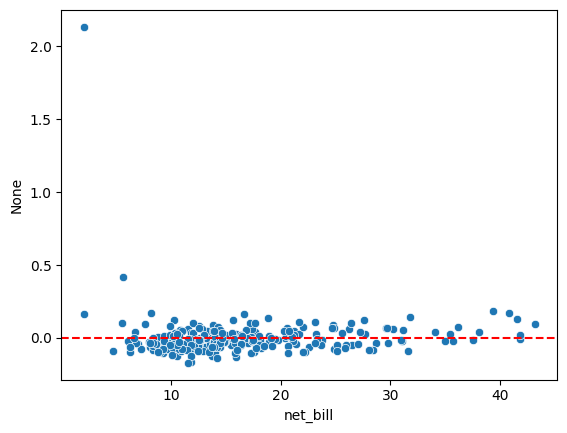

In [10]:
plt.close('all')
sns.scatterplot(x='net_bill', y=reg6.resid, data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [11]:
reg7 = smf.ols('tip_pct ~ smoker + np.log(net_bill)', data=tips).fit()
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     32.17
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           4.13e-13
Time:                        01:54:50   Log-Likelihood:                 125.19
No. Observations:                 244   AIC:                            -244.4
Df Residuals:                     241   BIC:                            -233.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6412      0.056     11.533      0.000       0.532       0.751
smoker[T.No]        -0.0319      0.019     -1.657      0.099      -0.070       0.006
np.log(net_bill)    -0.1547      0.020     -7.907      0.000      -0.193      -0.116
==============================================================================
Omnibus:                      436.655   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163563.737
Skew:                           9.667   Prob(JB):                         0.00
Kurtosis:                     128.357   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
reg8 = smf.ols('tip_pct ~ smoker + np.power(net_bill,2)', data=tips).fit()
reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.215
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           0.000354
Time:                        01:54:50   Log-Likelihood:                 104.37
No. Observations:                 244   AIC:                            -202.7
Df Residuals:                     241   BIC:                            -192.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2628      0.020     13.064      0.000       0.223       0.302
smoker[T.No]             -0.0355      0.021     -1.687      0.093      -0.077       0.006
np.power(net_bill, 2)    -0.0001    2.9e-05     -3.859      0.000      -0.000   -5.47e-05
==============================================================================
Omnibus:                      467.947   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232494.687
Skew:                          11.070   Prob(JB):                         0.00
Kurtosis:                     152.593   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- O modelo reg7 em Log é melhor.

In [13]:
# Dados reais
y_true = tips['tip'].values
# Predições
y_pred = reg8.fittedvalues

# Calcular o R^2
r2 = r2_score(y_true, y_pred)
print("Coeficiente de determinação (R^2):", r2)

Coeficiente de determinação (R^2): -4.132839724236927


In [14]:
# Dados reais
y_true = tips['tip'].values
# Predições
y_pred = reg4.fittedvalues

# Calcular o R^2
r2 = r2_score(y_true, y_pred)
print("Coeficiente de determinação (R^2):", r2)

Coeficiente de determinação (R^2): 0.3042409962087359


- O de reg8 é melhor.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [15]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [16]:
reg9 = smf.ols('renda ~ tempo_emprego', data=df).fit()
reg9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:54:50   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

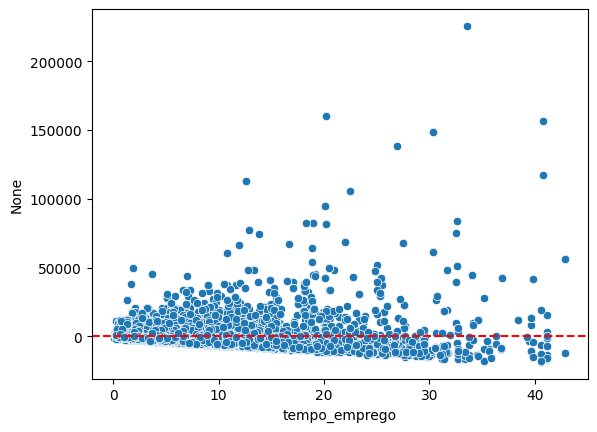

In [17]:
plt.close('all')
sns.scatterplot(x='tempo_emprego', y=reg9.resid, data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [18]:
reg10 = smf.ols('np.log(renda) ~ tempo_emprego', data=df).fit()
reg10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:54:50   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

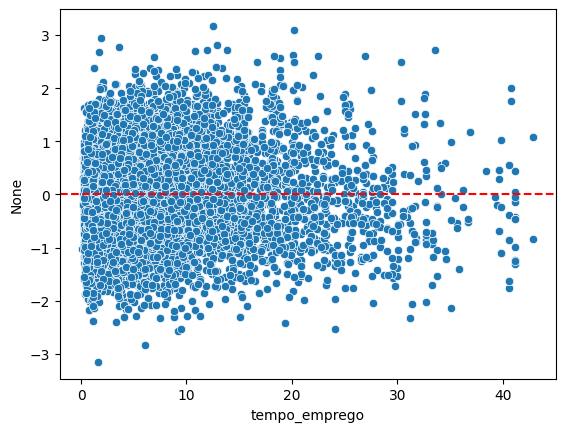

In [19]:
plt.close('all')
sns.scatterplot(x='tempo_emprego', y=reg10.resid, data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [20]:
print("R² reg9.: ",reg9.rsquared,"\nR² reg10: ",reg10.rsquared)

R² reg9.:  0.14823474099481704 
R² reg10:  0.1710846136093097


- O R² aumentou no segundo modelo. Além de que o 'coef' e o 'std_err' se aproximaram de zero.

In [21]:
reg11 = smf.ols('renda ~ data_ref + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()
reg11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     112.7
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:54:54   Log-Likelihood:            -1.2878e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12388   BIC:                         2.579e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5879.4874   2515.712     -2.337      0.019   -1.08e+04    -948.300
data_ref[T.2015-02-01]             -50.5760    377.087     -0.134      0.893    -789.726     688.574
data_ref[T.2015-03-01]             224.3334    378.075      0.593      0.553    -516.753     965.420
data_ref[T.2015-04-01]             644.2383    376.941      1.709      0.087     -94.624    1383.101
data_ref[T.2015-05-01]             177.6984    375.907      0.473      0.636    -559.138     914.535
data_ref[T.2015-06-01]             642.5355    377.474      1.702      0.089     -97.373    1382.444
data_ref[T.2015-07-01]             368.1166    376.181      0.979      0.328    -369.256    1105.490
data_ref[T.2015-08-01]             210.0260    377.469      0.556      0.578    -529.872     949.924
data_ref[T.2015-09-01]             153.4899    374.937      0.409      0.682    -581.446     888.425
data_ref[T.2015-10-01]             270.5873    377.498      0.717      0.474    -469.367    1010.542
data_ref[T.2015-11-01]             445.9166    377.674      1.181      0.238    -294.384    1186.217
data_ref[T.2015-12-01]             621.5670    378.978      1.640      0.101    -121.289    1364.423
data_ref[T.2016-01-01]             302.8712    377.441      0.802      0.422    -436.972    1042.715
data_ref[T.2016-02-01]             -41.6680    377.355     -0.110      0.912    -781.342     698.006
data_ref[T.2016-03-01]              57.9217    380.707      0.152      0.879    -688.323     804.166
sexo[T.M]                         6054.7914    155.926     38.831      0.000    5749.152    6360.431
posse_de_veiculo[T.True]            48.1619    150.456      0.320      0.749    -246.755     343.079
posse_de_imovel[T.True]            363.7476    148.821      2.444      0.015      72.035     655.460
tipo_renda[T.Bolsista]           -1285.7818   2566.067     -0.501      0.616   -6315.672    3744.108
tipo_renda[T.Empresário]           829.2786    158.912      5.218      0.000     517.786    1140.771
tipo_renda[T.Pensionista]        -2725.7882   2566.941     -1.062      0.288   -7757.392    2305.816
tipo_renda[T.Servidor público]     138.7937    236.527      0.587      0.557    -324.836     602.424
educacao[T.Pós graduação]         1017.3601   1691.601      0.601      0.548   -2298.441    4333.161
educacao[T.Secundário]             570.3332    766.157      0.744      0.457    -931.455    2072.121
educacao[T.Superior completo]     1185.7821    769.133      1.542      0.123    -321.837    2693.402
educacao[T.Superior incompleto]    166.9395    827.796      0.202      0.840   -1455.669    1789.548
estado_civil[T.Separado]          1164.5763   1183.767      0.984      0.325   -1155.791    3484.944
estado_civil[T.Solteiro]           825.4338   1158.89

In [22]:
reg12 = smf.ols('np.log(renda) ~ sexo + tipo_renda + posse_de_imovel + np.power(idade, 2) + tempo_emprego',data=df).fit()
reg12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     841.5
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:54:55   Log-Likelihood:                -13625.
No. Observations:               12427   AIC:                         2.727e+04
Df Residuals:                   12418   BIC:                         2.733e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.2988      0.020    360.312      0.000       7.259       7.339
sexo[T.M]                          0.7983      0.014     58.092      0.000       0.771       0.825
tipo_renda[T.Bolsista]             0.2733      0.242      1.130      0.258      -0.201       0.747
tipo_renda[T.Empresário]           0.1612      0.015     10.850      0.000       0.132       0.190
tipo_renda[T.Pensionista]         -0.2692      0.242     -1.114      0.265      -0.743       0.205
tipo_renda[T.Servidor público]     0.0770      0.022      3.476      0.001       0.034       0.120
posse_de_imovel[T.True]            0.0884      0.014      6.440      0.000       0.061       0.115
np.power(idade, 2)              5.107e-05   8.74e-06      5.845      0.000    3.39e-05    6.82e-05
tempo_emprego                      0.0617      0.001     59.519      0.000       0.060       0.064
==============================================================================
Omnibus:                        0.964   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.935
Skew:                           0.018   Prob(JB):                        0.627
Kurtosis:                       3.022   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
print("R² reg11: ",reg11.rsquared,"\nR² reg12: ",reg12.rsquared)

R² reg11:  0.2568904789014469 
R² reg12:  0.351544085989011


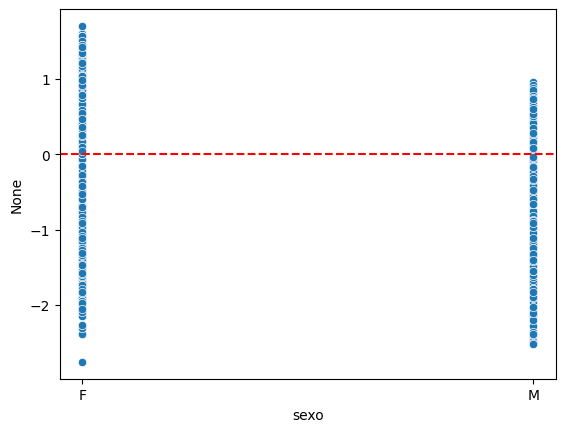

In [24]:
# resíduo sexo
sns.scatterplot(x='sexo', y=reg12.resid, data=df[df['renda'] < 10000])
plt.axhline(y=0, color='r', linestyle='--')

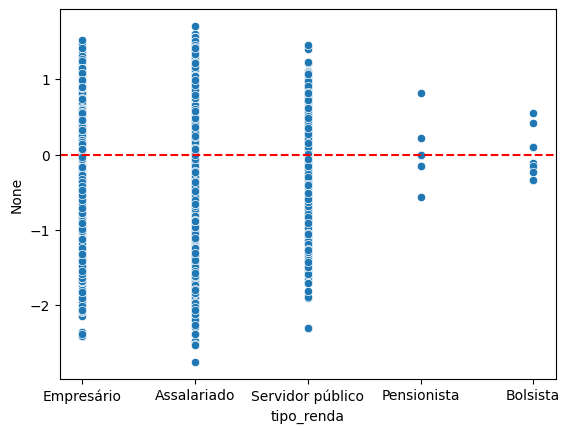

In [25]:
# resíduo tipo_renda
sns.scatterplot(x='tipo_renda', y=reg12.resid, data=df[df['renda'] < 10000])
plt.axhline(y=0, color='r', linestyle='--')

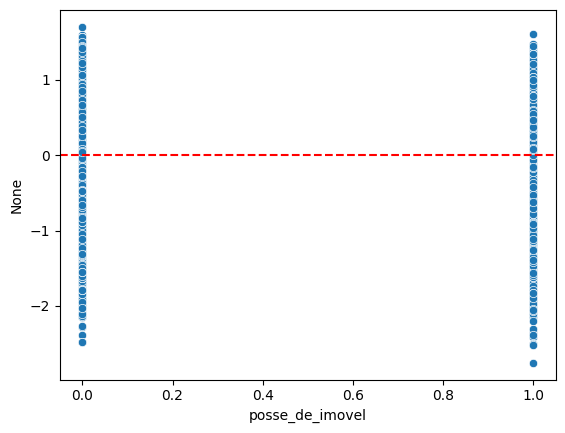

In [26]:
# resíduo posse_de_imovel
sns.scatterplot(x='posse_de_imovel', y=reg12.resid, data=df[df['renda'] < 10000])
plt.axhline(y=0, color='r', linestyle='--')

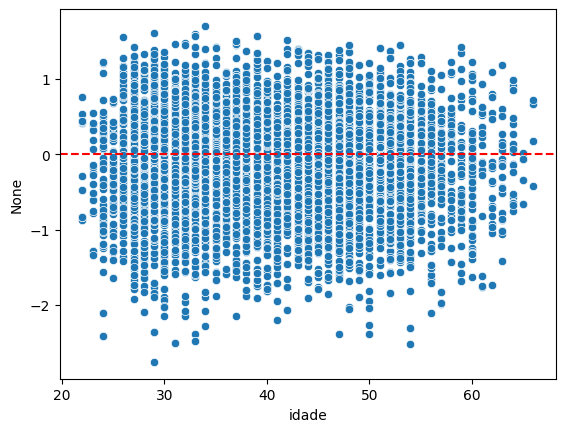

In [27]:
# resíduo idade
sns.scatterplot(x='idade', y=reg12.resid, data=df[df['renda'] < 10000])
plt.axhline(y=0, color='r', linestyle='--')

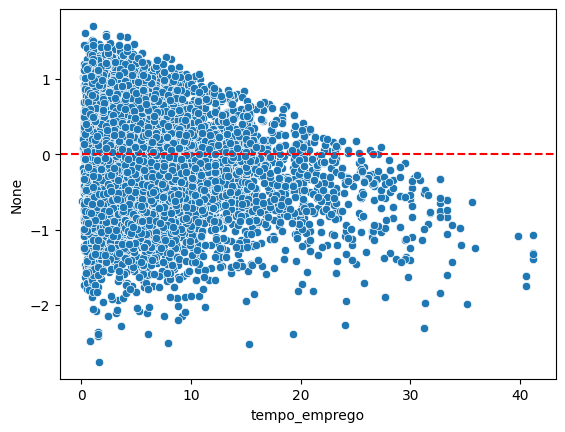

In [28]:
# resíduo tempo_emprego
sns.scatterplot(x='tempo_emprego', y=reg12.resid, data=df[df['renda'] < 10000])
plt.axhline(y=0, color='r', linestyle='--')

- Podemos identificar com os gráficos:
  - Em 'sexo' possui uma quantidade maior de mulheres;
  - Em 'tipo_renda' sua concentração está em assalariado, sendo seguido de empresario e servidor publico;
  - Em 'posse_de_imovel' ambos estão parecidos, não tendo uma diferença abrupta;
  - Em 'idade' o padrão é uniforme, com uma certa concentração no meio e dispersação nas extremidades;
  - Em 'tempo_emprego' é uma relação decrescente, diminuindo ao longo que a pessoa envelhece.